# 2-Programming Exercise 1: Linear Regression Coursera

### The same task but with sklearn 

**The first file manual_linea_regression has some of handling**

##  Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from manual_linea_regression import init_2d_graphs,features_normalization_with_std
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

###  Read CSV file

In [5]:
df_file = pd.read_csv('csv_files/ex1data1.csv')
df_file.head()

,city_population,food_truck_profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


##  initialization & graph visualization

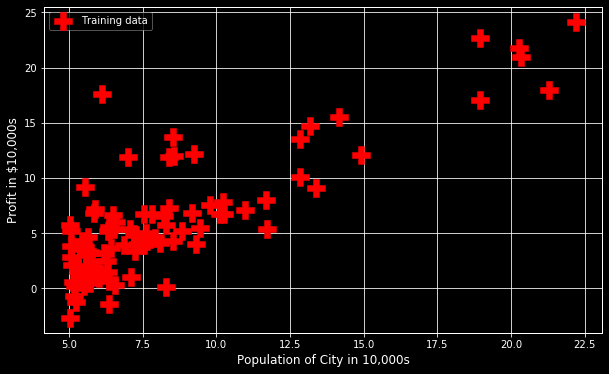

In [6]:
# our initialized and graph draw for our dataset
x = df_file['city_population'] # x_axis
y = df_file['food_truck_profit'] # y_axis
# because y is shape (97,) whcih rank of 0 and we need to be (97,1) to subtract from y_hat
y = y.values.reshape(len(x),1) # because of type Series we use .values
x = x.values.reshape(len(x),1) # because of type Series we use .values

x_label = 'Population of City in 10,000s'
y_label = 'Profit in $10,000s'
graph_legend = 'Training data'
# the labels of x & y

init_2d_graphs('ggplot', 'dark_background' )
plt.scatter(x,y, s=300, c='red', marker='P', label=graph_legend)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()

##  Now start to implement gradient descent but with sklearn

LinearRegression fits a linear model with weights that  minimize the residual sum of squares between real out of our dataset and the predicited values from features.

**Most important LinearRegression Paramters**

- fit_intercept: its related to bias and Mathematically, it adds a column of 1s to the inputs like what we do in manual_linea_regression file.
- normalize: The data will be normalized to same range of values before regression.

**Attributes**
- coef_: the slope of the linear function
- intercept_: the line intercept y in 

In [7]:
LRModel = LinearRegression() # Take object

In [8]:
LRModel.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print("The Slope or Weights of LRModel is", LRModel.coef_)

The Slope or Weights of LRModel is [[1.19303364]]


In [10]:
print("The line intercept y in", LRModel.intercept_)

The line intercept y in [-3.89578088]


In [11]:
print("The Accuracy score of our Model is:", LRModel.score(x,y))

The Accuracy score of our Model is: 0.7020315537841397


## The above printed two variables coef_, intercept_ is our weights

In [12]:
y_hat = LRModel.predict(x)

## Now it's time for display the fitting line

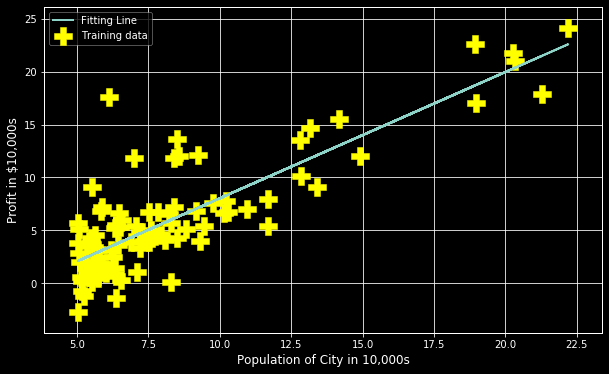

In [13]:
init_2d_graphs('ggplot', 'dark_background' )
x_label = 'Population of City in 10,000s'
y_label = 'Profit in $10,000s'
graph_legend = 'Training data'
plt.plot(x, y_hat, label= 'Fitting Line',linewidth=2)
plt.scatter(x,y, s=300, c='yellow', marker='P', label=graph_legend) # our data
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()

## Calculate cost function with last weights


![alt text](images/cost_function.png "cost_function")

In [14]:
m = len(y) # get the number of training examples
thetas = np.array([LRModel.intercept_, LRModel.coef_])
thetas.shape

(2, 1)

In [15]:
J = (1/(2*m)) * np.matmul((y_hat - y).T, (y_hat - y)) 
print("The cost funtion of our training data is: ", J)

The cost funtion of our training data is:  [[4.47697138]]


#  linear regression with multiple variables

In [16]:
df_file = pd.read_csv('csv_files/ex1data2.csv')
#now you can see the data after convert to csv with columns name
df_file.head()

,house_size,number_of_bedrooms,house_price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## fetures normalization

In [17]:
df_file = features_normalization_with_std(df_file)

In [18]:
x = np.array(df_file.iloc[:, :2])# get the 2 features columns)
y = df_file['house_price'] # the real output 

# # because y is shape (97,) whcih rank of 0 and we need to be (97,1) to subtract from y_hat
y = y.values.reshape(len(y),1) # because of type Series we use .values

# variables and parameters initialize
all_cost = []
m = len(y) 
print(x.shape)
print("#"*80)
print("Number of training example: ", m)
print("#"*80)
Alpha = .1 # learning rate
iterations = 100 # number of gradient descent iterations
thetas = np.zeros((3,1)) # initialize threats as 2d array and 2*1 dimension with 0 values
print('Theats shape is: ', thetas.shape)
print("#"*80)
print('Theats values are: ', thetas)
print("#"*80)


(47, 2)
################################################################################
Number of training example:  47
################################################################################
Theats shape is:  (3, 1)
################################################################################
Theats values are:  [[0.]
 [0.]
 [0.]]
################################################################################


In [19]:
print("Now the first 5 rows of x values are: ", x[:5, :])

Now the first 5 rows of x values are:  [[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


In [20]:
LRModel = LinearRegression() # Take object

In [21]:
LRModel.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print("The Weights of LRModel is", LRModel.coef_)

The Weights of LRModel is [[ 0.88476599 -0.05317882]]


In [23]:
print("The line intercept y in", LRModel.intercept_)

The line intercept y in [-9.46326835e-17]


In [24]:
print("The Accuracy score of our Model is:", LRModel.score(x,y))

The Accuracy score of our Model is: 0.7329450180289142
